Training Set
Number of Structures: 1083
RMSD <1: {'pdb': 100, 'br0': 62, 'be0': 6}
RMSD = 0: 113


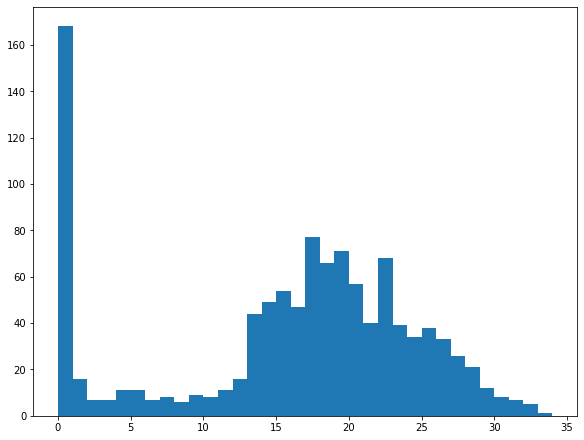

Validation Set
Number of Structures: 396
RMSD <1: {'br0': 18, 'pdb': 36}
RMSD = 0: 48


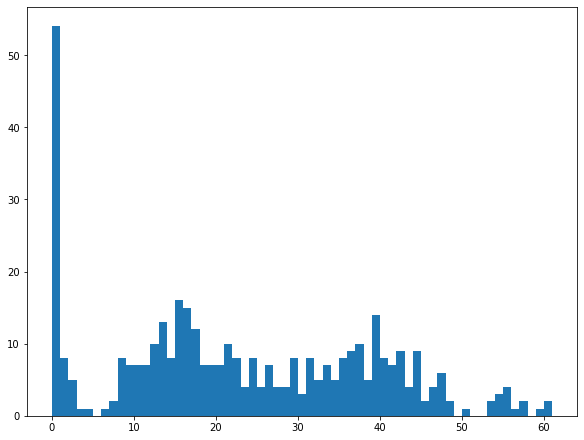

Test Set
Number of Structures: 277
RMSD <1: {'pdb': 42, 'br0': 18, 'be0': 4}
RMSD = 0: 53


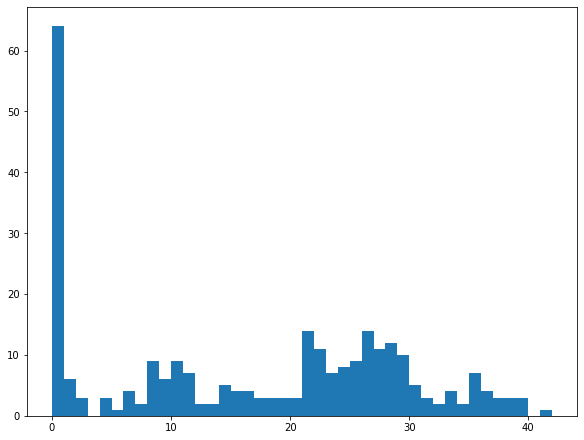

5S rRNAs and tRNAs with replica exchange
Number of Structures: 2310
RMSD <1: {'br0': 32, 'be0': 2}
RMSD = 0: 4


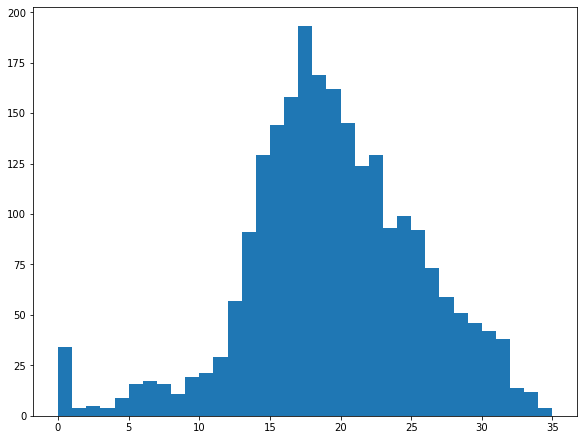

In [1]:
import matplotlib.pyplot as plt

for list in ["../data/train_rmsd_list.txt", "../data/val_rmsd_list.txt", "../data/test_rmsd_list.txt", "../data/5stRNA_test_rmsd_list.txt"]:
    with open(list) as fh:
        rmsd_list = []
        count_dict = {}
        rmsd_zero = 0
        for line in fh.readlines():
            name, rmsd = (line.rstrip()).split("\t")
            rmsd = float(rmsd)
            rmsd_list.append(rmsd)

            if rmsd == 0:
                rmsd_zero += 1    
            if rmsd < 1:
                if name[-6:-3] == "001" or name[-7:-5] == "rf":
                    if "pdb" not in count_dict:
                        count_dict["pdb"] = 1
                    else:
                        count_dict["pdb"] += 1
                else:
                    cat = name[-6:-3]
                    if cat not in count_dict:
                        count_dict[cat] = 1
                    else:
                        count_dict[cat] += 1
    if "train" in list:
        print("Training Set")
    elif "val" in list:
        print("Validation Set")
    elif "5st" in list:
        print("5S rRNAs and tRNAs with replica exchange")
    elif "test" in list:
        print("Test Set")
    print("Number of Structures:", len(rmsd_list))
    print("RMSD <1:", count_dict)
    print("RMSD = 0:", rmsd_zero)
    fig, axs = plt.subplots(layout='constrained', figsize=(8, 6))
    axs.hist(rmsd_list, bins = range(int(min(rmsd_list)), int(max(rmsd_list))+1, 1))
    plt.show()